# Weather Prediction 

I am using [this](https://www.kaggle.com/datasets/alejopaullier/new-york-city-weather-data-2019?rvi=1) dataset from kaggle to predict the weather in NYC


## About Dataset

### Column

- `date` : Date in format DD/MM/YYYY.
- `tmax` : Maximum temperature of the day in °F.
- `tmin` : Minimum temperature of the day in °F.
- `tavg` : Average temperature of the day in °F.
- `departure` : Departure from normal temperature in °F.
- `HDD` : Heating Degree Days.
- `CDD` : Cooling Degree Days.
- `precipitation` : Precipitation in inches.
- `new_snow` : New snowfall in inches.
- `snow_depth` : Snowfall depth in inches.

## Exploratory Data Analysis

### Load the Dataset

In [24]:
import pandas as pd

data = pd.read_csv('nyc_temperature.csv')

Getting the head of the data 

In [25]:
print(data.head())
print(data.info())
print(data.describe)

     date  tmax  tmin  tavg  departure  HDD  CDD precipitation new_snow  \
0  1/1/19    60    40  50.0       13.9   15    0          0.08        0   
1  2/1/19    41    35  38.0        2.1   27    0             0        0   
2  3/1/19    45    39  42.0        6.3   23    0             T        0   
3  4/1/19    47    37  42.0        6.5   23    0             0        0   
4  5/1/19    47    42  44.5        9.1   20    0          0.45        0   

  snow_depth  
0          0  
1          0  
2          0  
3          0  
4          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           365 non-null    object 
 1   tmax           365 non-null    int64  
 2   tmin           365 non-null    int64  
 3   tavg           365 non-null    float64
 4   departure      365 non-null    float64
 5   HDD            365 non-null    int64  
 6

Check for missing value in the dataset

In [26]:
print(data.isnull().sum())

date             0
tmax             0
tmin             0
tavg             0
departure        0
HDD              0
CDD              0
precipitation    0
new_snow         0
snow_depth       0
dtype: int64


As we can see in the results above that there is no data from the dataset that is empty

**Handle Non-numeric Value**

In [27]:
# Replace 'T' with a small value in the precipitation columns
data['precipitation'] = data['precipitation'].replace('T', 0.01)
data['new_snow'] = data['new_snow'].replace('T', 0.01)
data['snow_depth'] = data['snow_depth'].replace('T', 0.01)

# Convert columns to numeric
data['precipitation'] = pd.to_numeric(data['precipitation'])
data['new_snow'] = pd.to_numeric(data['new_snow'])
data['snow_depth'] = pd.to_numeric(data['snow_depth'])

### Visualize the Data

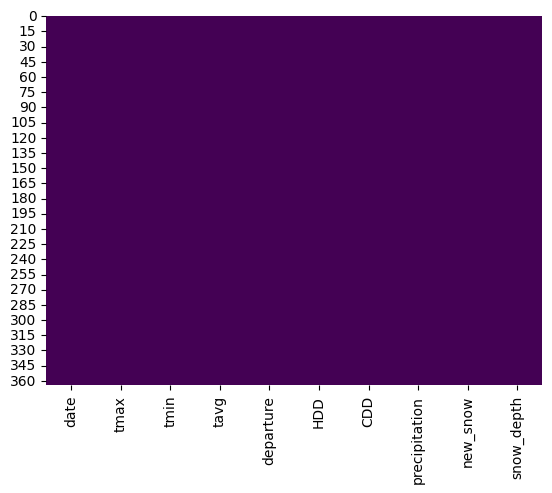

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis')
plt.show()

Univariate Analysis using histogram
- `histogram` : To understand the distribution of each feature

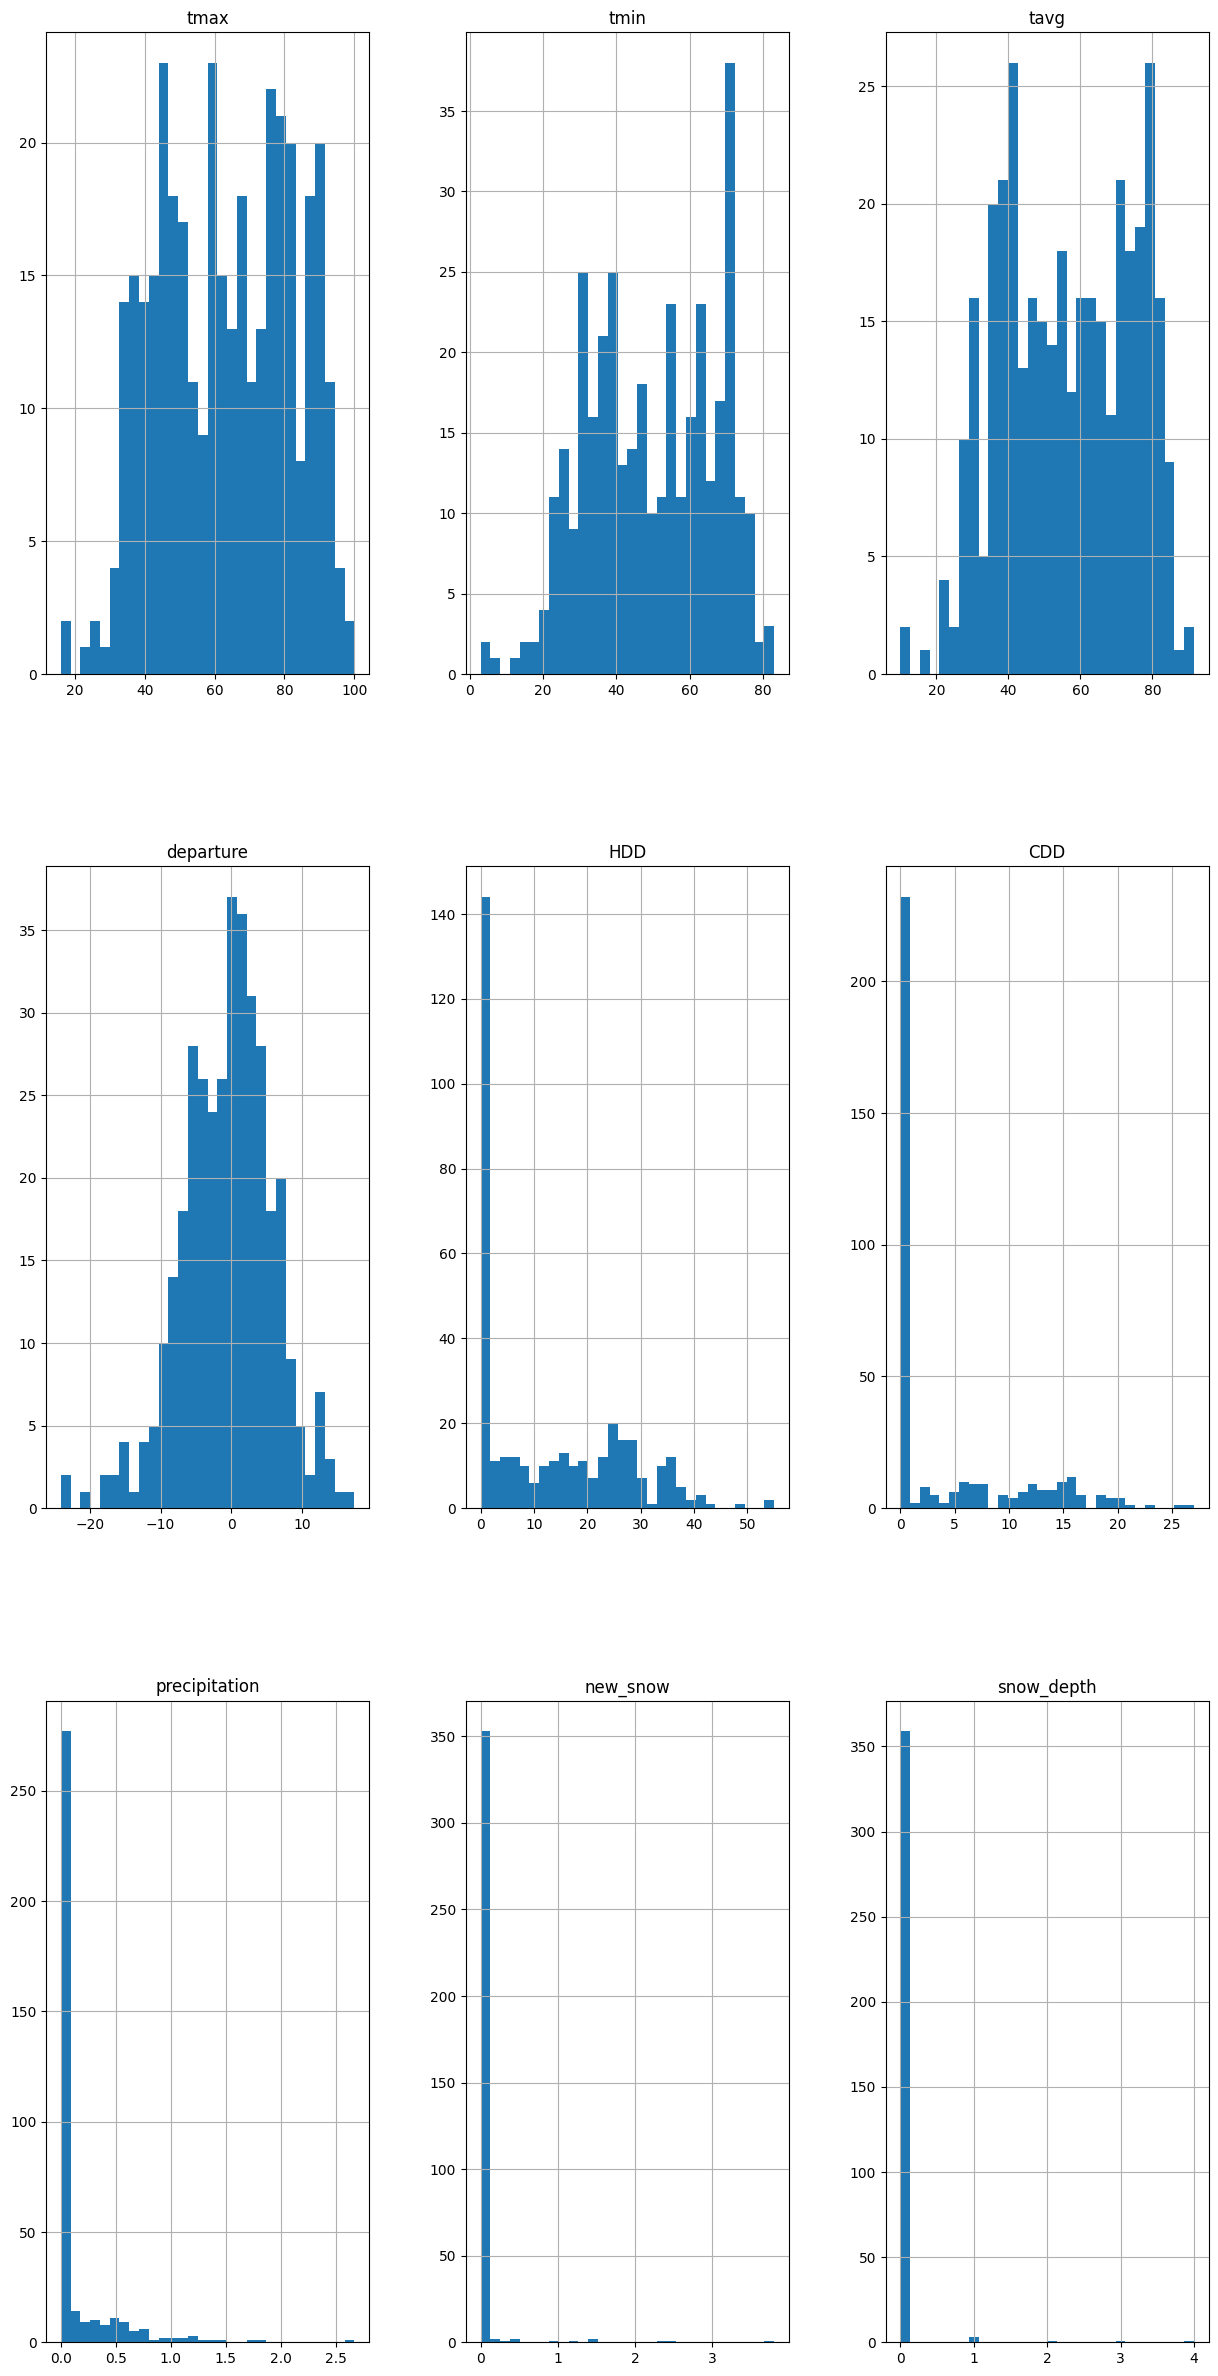

In [29]:
data.hist(bins = 30, figsize = (15,30))
plt.show()

- `Box Plot` : To detect outliners

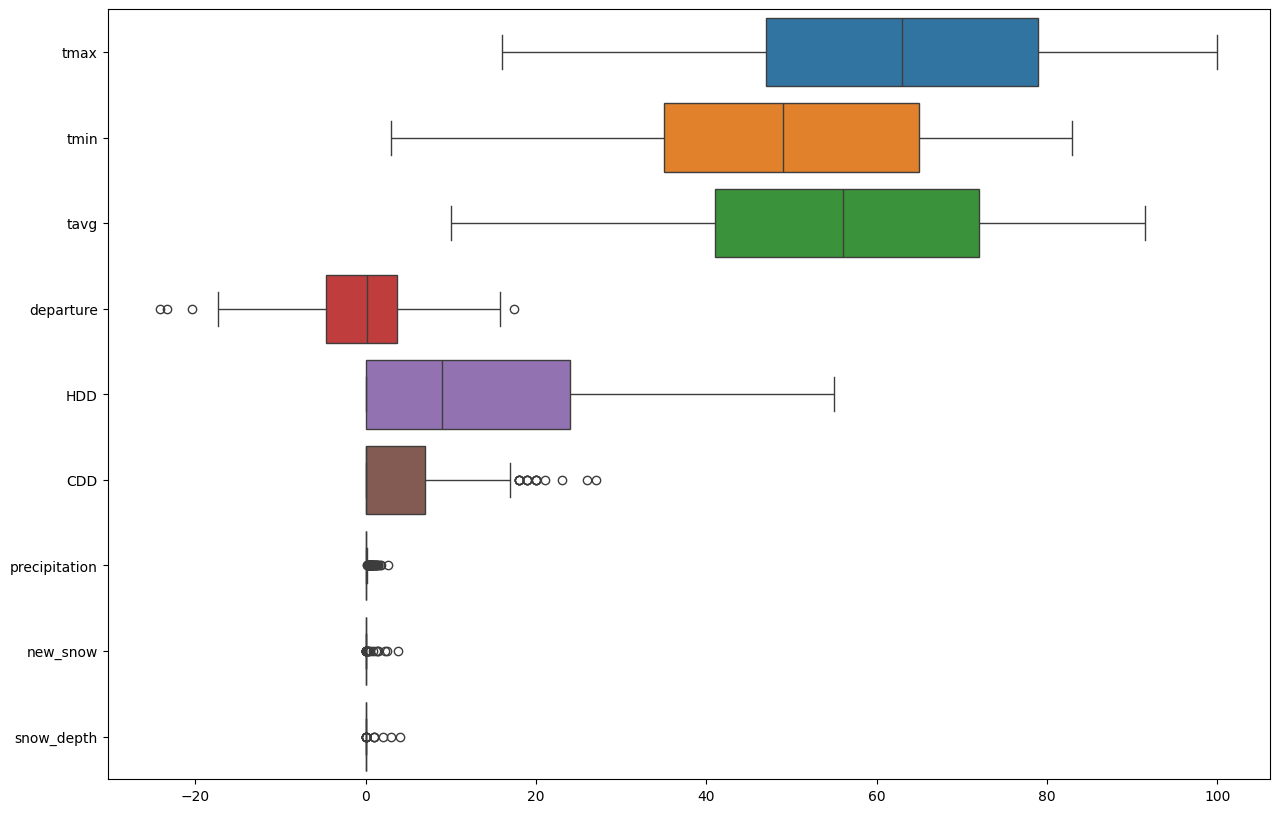

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(data=data, orient='h')
plt.show()

### Time Series Analysis

- **Line plot of Temperature Over Time**

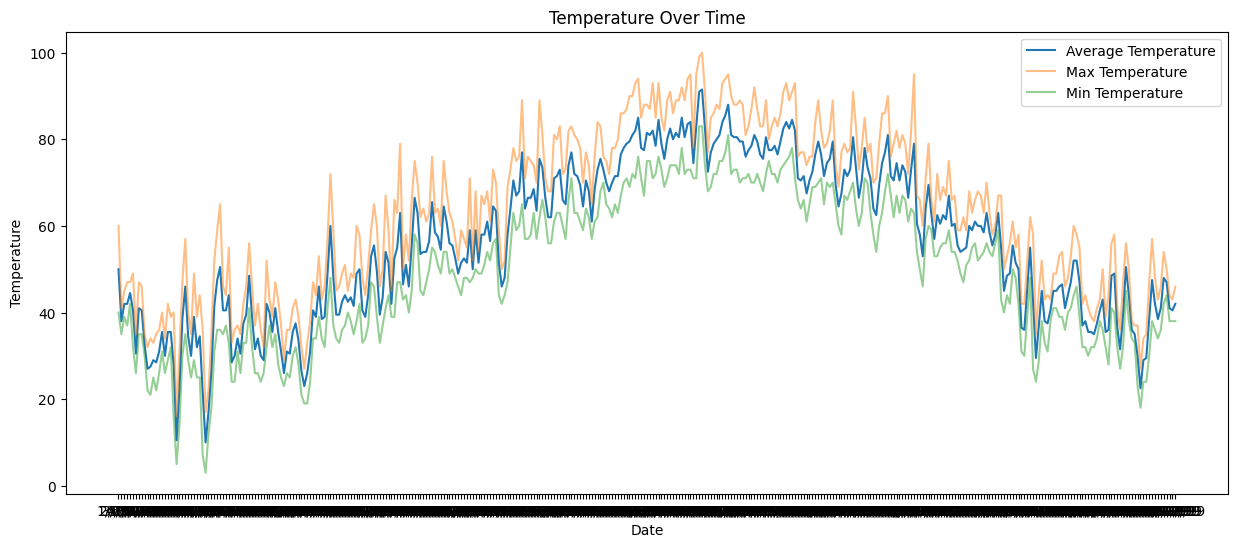

In [31]:
plt.figure(figsize=(15,6))
plt.plot(data['date'], data['tavg'], label='Average Temperature')
plt.plot(data['date'], data['tmax'], label='Max Temperature', alpha=0.5)
plt.plot(data['date'], data['tmin'], label='Min Temperature', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

- **Seasonal Trends**


Let's make sure the `date` column is correctly converted to datetime. We'll add some checks and reapply the conversion if necessary.
and then If there are any non-date values that couldn't be converted, they will be turned into `NaT` (Not a Time). We can drop these rows or handle them accordingly.

In [34]:
# Ensure the 'date' column is a datetime object
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Check if the conversion was successful
print(data['date'].head())
print(data['date'].dtype)

data = data.dropna(subset=['date'])

0   2019-01-01
1   2019-02-01
2   2019-03-01
3   2019-04-01
4   2019-05-01
Name: date, dtype: datetime64[ns]
datetime64[ns]


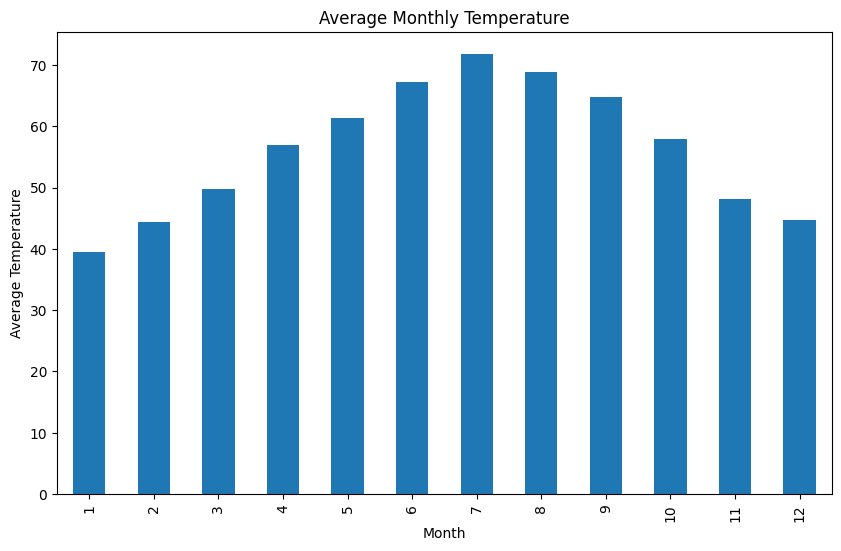

In [35]:
data['Month'] = data['date'].dt.month
monthly_avg_temp = data.groupby('Month')['tavg'].mean()

plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Average Monthly Temperature')
plt.show()

Based on the data, it can be seen that the monthly average temperature follows a certain pattern. The lowest temperature occurs in **month 1 (January)**, and continues to increase gradually until it peaks in **month 7 (July)**. After that, the average temperature starts to decrease again gradually until it reaches its lowest point at the end of the year.

This pattern shows a clear seasonal trend. *The highest average temperatures occur in the summer months* (June-August in the northern hemisphere), while *the lowest temperatures occur in the winter months* (December-February in the northern hemisphere).

### Correlation Analysis

- **Correlation Matrix**

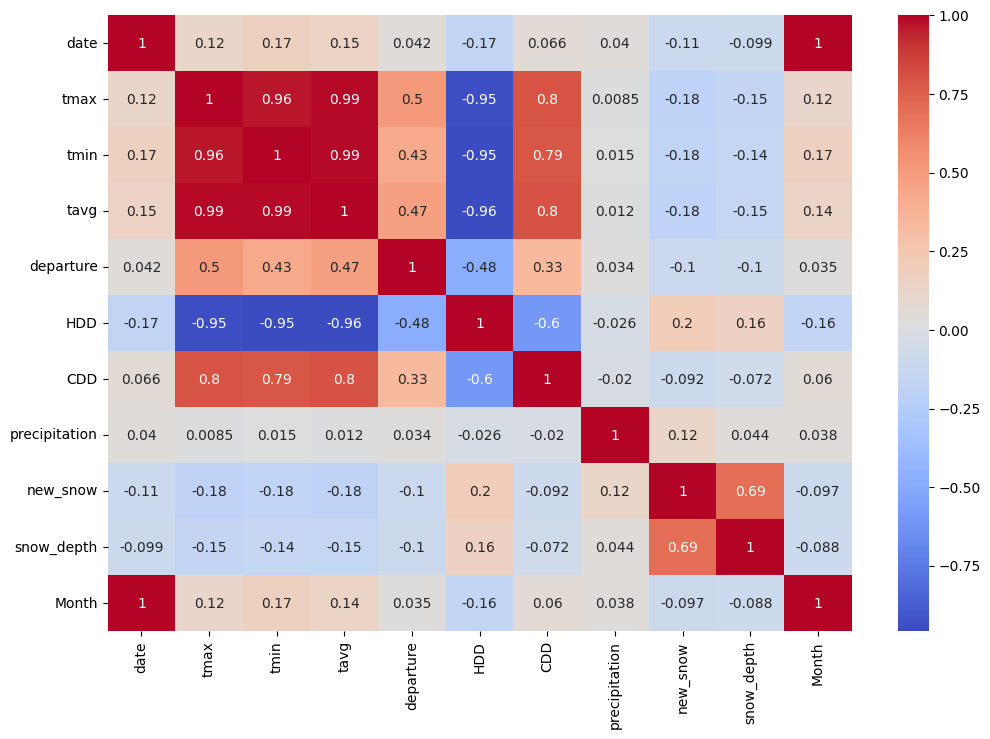

In [36]:
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

From the results of the Correlation Matrix above, we can conclude that

1. To predict the maximum temperature (tmax):
    - `tavg` (correlation 0.99) and `tmin` (correlation 0.96) have a **very strong correlation**. This makes sense as the maximum temperature is closely related to the average temperature and minimum temperature on the same day.
2. To predict the minimum temperature (tmin):
    - `tavg` (correlation 0.99) and `tmax` (correlation 0.96) also have a **very strong correlation**, for the same reason as above.
3. To predict the average temperature (tavg):
    - `tmax` (correlation 0.99) and `tmin` (correlation 0.99) have a **perfect correlation**, as the average temperature is calculated from the maximum and minimum temperatures.
4. To predict temperature deviation (departure):
    - `HDD` (correlation -0.48) has a **strong negative correlation**, indicating that the higher the temperature deviation from normal, the lower the heating requirement (Heating Degree Days).
5. To predict precipitation:
    - `new_snow` (correlation 0.12) has a **weak positive correlation**, which makes sense since rain and new snow can occur simultaneously under certain conditions.


- `Pairplot`: To see pairwise relationships

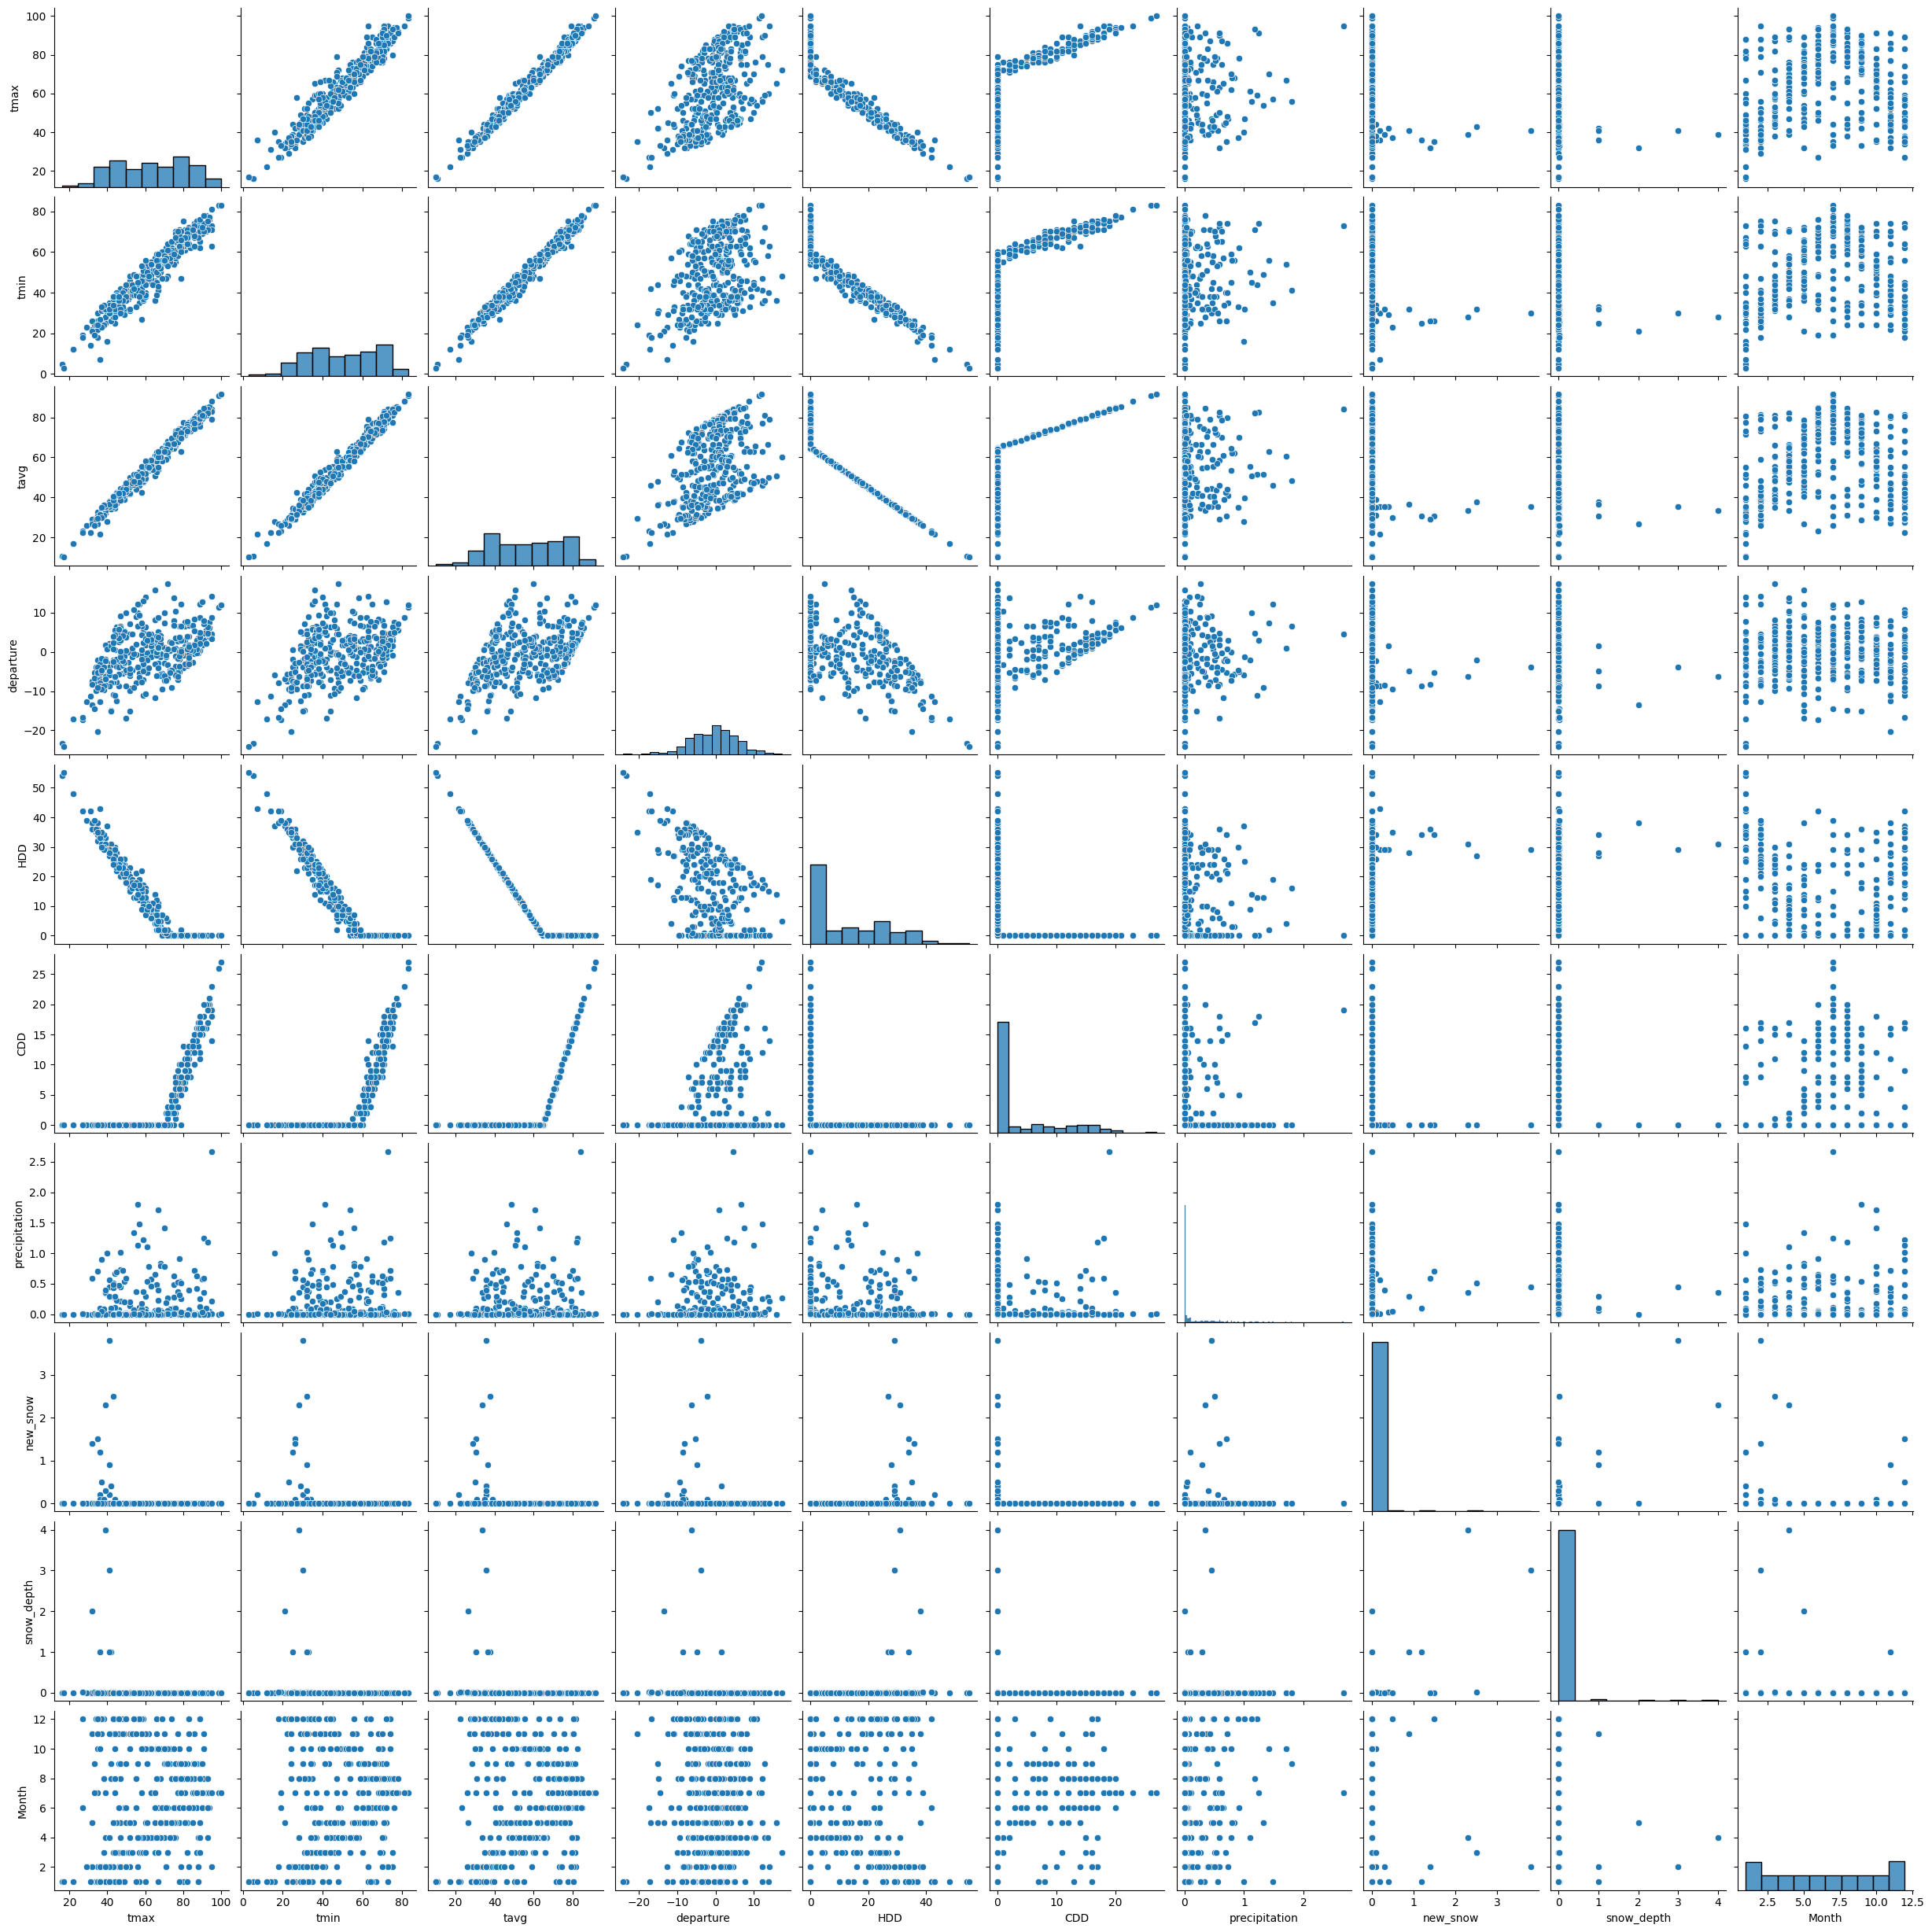

In [37]:
sns.pairplot(data)
plt.show()

- **Box Plot by Month**: To see temperature distribution per month.

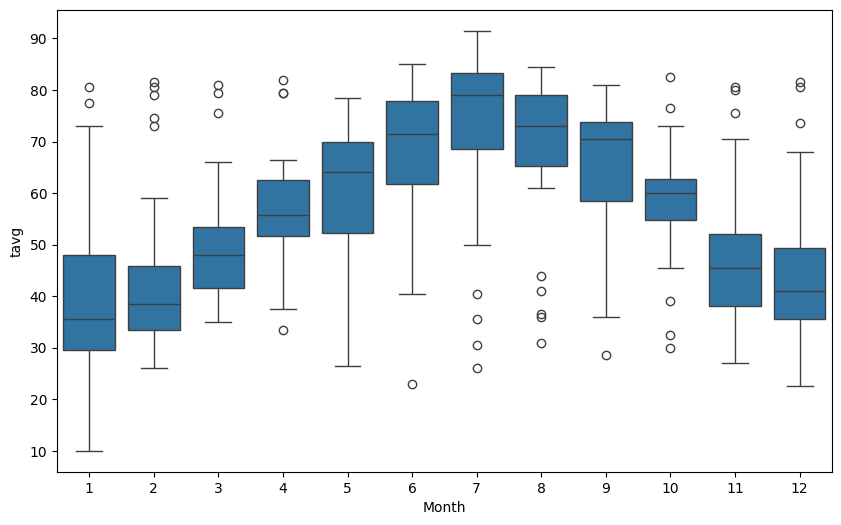

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='tavg', data=data)
plt.show()

This graph shows a typical seasonal pattern, with temperatures increasing towards summer and decreasing towards winter.

Based on the above considerations, the `tavg` (Average Temperature) column is an excellent choice for a prediction target because:

- Average temperature provides very useful general information about weather conditions.
- There are clear seasonal patterns that can be predicted using other features such as maximum temperature, minimum temperature, and precipitation.
- Average temperature is often used in various weather applications such as outdoor activity planning and energy management.

### Creating Model for Predicting Average Temperature (tavg)

Mean Squared Error: 2.083457294885083e-28


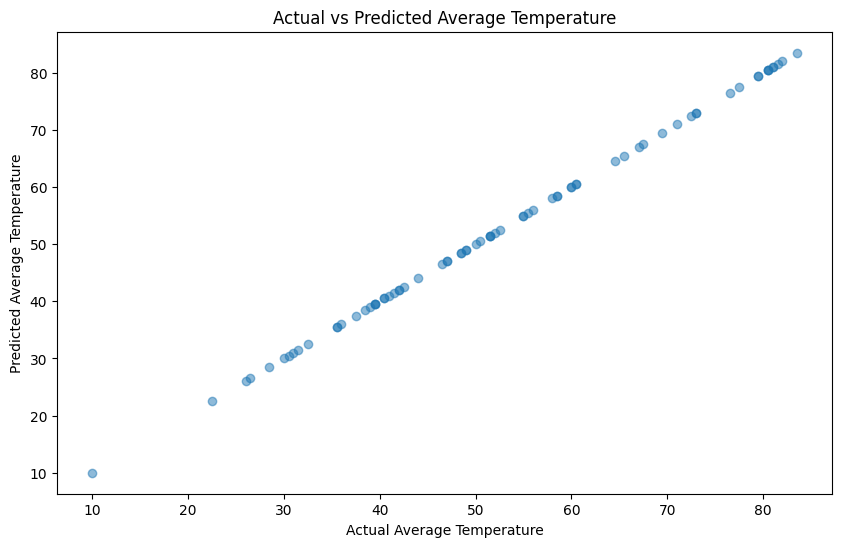

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting features and target
features = data[['tmax', 'tmin', 'departure', 'HDD', 'CDD', 'precipitation', 'new_snow', 'snow_depth']]
target = data['tavg']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test_scaled)


# Calculating relative error percentage
relative_error_percentage = ((y_pred - y_test) / y_test) * 100

# Plotting actual vs predicted values with relative error percentage
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Average Temperature')
plt.ylabel('Predicted Average Temperature')
plt.title('Actual vs Predicted Average Temperature')
plt.legend()

# Adding text for relative error percentage
for i in range(len(relative_error_percentage)):
    plt.text(y_test[i], y_pred[i], f'{relative_error_percentage[i]:.2f}%', ha='right', va='center')

plt.show()